Plotting pulse propagation along a transmission
- November 4, 2021

First, import required modules

In [40]:
import numpy as np
import matplotlib.pyplot as plt

Can make use of heaviside function to construct a square pulse.  First, create a list of times and then plot the heaviside function.

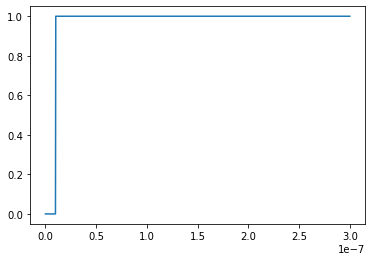

In [41]:
tt = np.arange(0, 300e-9, 0.1e-9) # seconds
t0 = 10e-9 # seconds (transition time)
plt.plot(tt, np.heaviside(tt - t0, 0.5));

Define a function to construct a square pulse.

In [42]:
def pulse(tt, t0, width, height):
    return height*(np.heaviside(tt - t0, 0.5) - np.heaviside(tt - t0 - width, 0.5))

Call our function and plot the result.

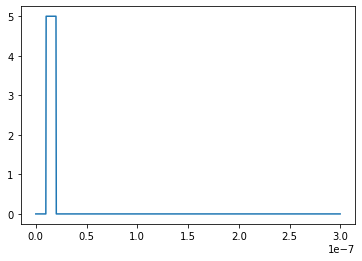

In [43]:
w = 10e-9 # seconds (pulse width)
h = 5 # volts (pulse height)
plt.plot(tt, pulse(tt, t0, w, h));

Prepare some values needed to construct the voltage at the input of the transmission line.

In [44]:
Z0 = 50 # ohms (charactistics impedance of transmission line)
ZL = 0 # Short circuit
#ZL = 999999 # Open circuit
#ZL = Z0 # impedance matching
#ZL = 80 # ohms
Gamma = (ZL - Z0)/(ZL + Z0) # Reflection coefficient
ell = 8 # m (length of transmission line)
c = 3e8 # m/s (speed of light)
s = 0.7*c # 70% the speed of light

Finally, calculate and plot $v_\mathrm{in}$.

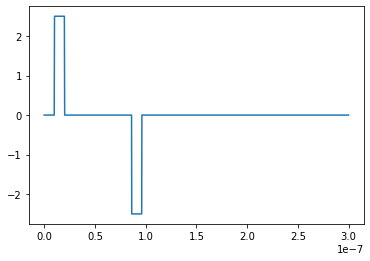

In [45]:
vin = pulse(tt, t0, w, h)/2 + (Gamma/2)*pulse(tt, t0 + 2*ell/s, w, h)
plt.plot(tt, vin);